Root Mean Squared Error: 10.813023239378571


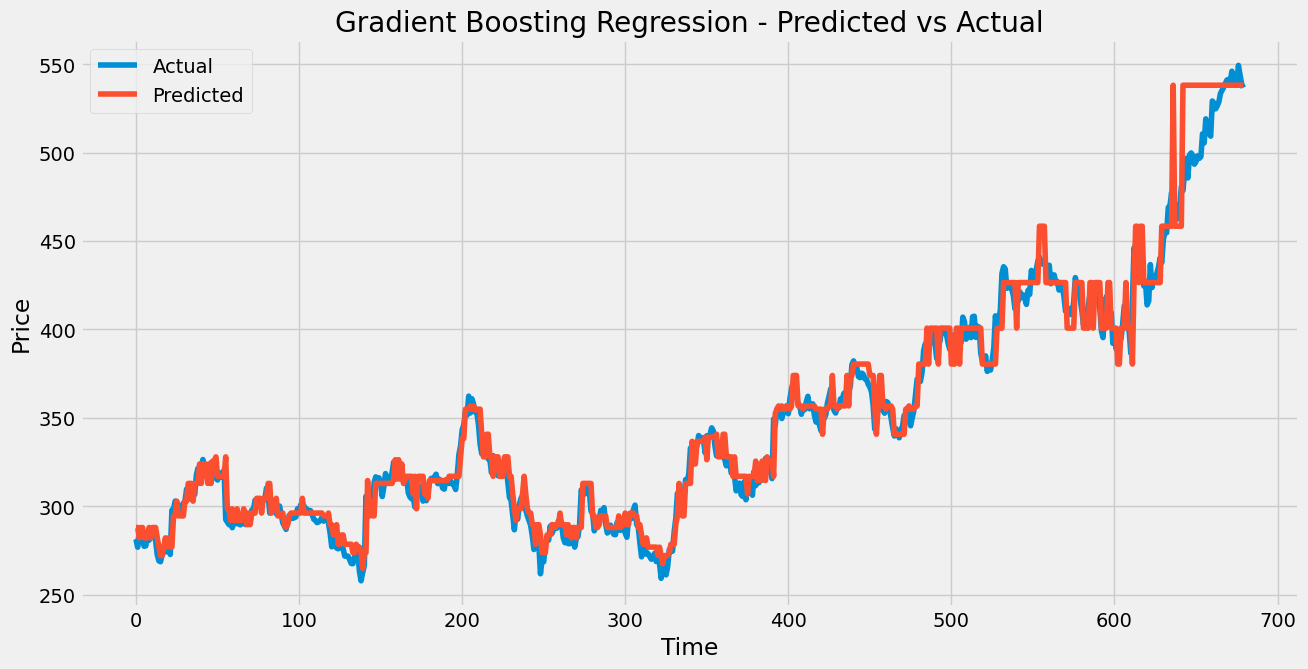

In [24]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load the data
df = pd.read_csv('ICICIBANK.csv')

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .75)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Create the GBT model
gbt_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='squared_error')

# Train the model
gbt_model.fit(x_train, y_train)

# Test data set
test_data = scaled_data[training_data_len - 30:, :]

# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Getting the models predicted price values
predictions = gbt_model.predict(x_test.reshape(-1, 30))

# Undo scaling
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Calculate/Get the value of RMSE
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("Root Mean Squared Error:", rmse)

# Plot the predicted values against the actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Gradient Boosting Regression - Predicted vs Actual')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()